### Data Preprocessing

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* 1 min

In [7]:
dt_signal_1 = np.load('/workspace/new_test_data/ica_ppg_1.npy') # 1 min ppg

In [8]:
lb_list = np.load('/workspace/new_test_data/ica_lb.npy')

In [9]:
data = list(dt_signal_1)

In [10]:
df = pd.DataFrame(data)

In [11]:
label = list(lb_list)

In [12]:
df['label'] = label

In [13]:
df 
# label : -1 down, 0 norm , 1 up 
# 0 norm
# -1, 1, abnorm

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
0,28.074800,27.284800,27.284800,26.494801,26.494801,25.704901,25.704901,24.914900,24.519899,24.914900,...,40.319199,39.529301,38.344299,37.949299,37.159401,36.369400,35.579399,34.789501,33.999500,-1.0
1,42.689098,40.714199,40.319199,39.134300,38.344299,37.554298,35.974400,35.184399,34.394501,33.604500,...,53.748600,54.143600,55.328602,56.118500,56.513500,56.118500,56.908501,56.908501,56.908501,-1.0
2,50.588799,48.613899,47.823898,45.848999,44.269001,42.689098,41.504200,39.924198,39.134300,38.739300,...,49.798801,52.168701,52.958698,54.933601,56.513500,56.908501,57.303501,58.093399,58.093399,0.0
3,35.579399,35.184399,34.789501,34.394501,33.604500,33.209499,32.419601,31.234600,30.444599,29.654699,...,61.253300,60.463299,59.673401,59.278400,57.698502,56.908501,55.328602,53.748600,51.378700,0.0
4,33.999500,33.604500,33.604500,33.209499,32.814499,32.419601,32.024601,31.629601,30.839600,30.049700,...,56.513500,56.118500,55.328602,54.143600,52.563702,51.378700,50.193802,47.823898,45.453999,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,35.974400,35.974400,35.974400,35.974400,35.974400,36.369400,36.369400,36.369400,37.159401,37.554298,...,39.924198,39.924198,39.924198,39.924198,39.529301,39.529301,39.134300,38.739300,38.739300,0.0
1196,35.579399,35.579399,35.579399,35.974400,35.579399,35.579399,35.579399,35.974400,35.974400,35.974400,...,37.159401,37.159401,37.159401,37.159401,37.159401,37.159401,37.159401,37.159401,37.159401,0.0
1197,-1.153980,-1.153980,-1.153980,-1.153980,-1.153980,-1.153980,-1.153980,-1.153980,-1.153980,-1.153980,...,-1.153980,-1.153980,-1.153980,-0.758994,-1.153980,-1.153980,-1.548960,-1.153980,-1.153980,0.0
1198,42.294102,42.294102,42.294102,42.294102,41.899200,41.504200,41.109200,40.714199,39.924198,40.319199,...,35.579399,35.579399,35.579399,35.579399,35.579399,35.579399,35.579399,35.579399,35.579399,0.0


In [14]:
df['label'].value_counts()

 0.0    1013
-1.0     187
Name: label, dtype: int64

* bandpass filter

In [16]:
from scipy.signal import butter
from scipy.signal import lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs # 50, fs:100 
    low = lowcut / nyq # 0.5/50 = 1/100, lowcut: 0.5
    high = highcut / nyq # 15/50 = 30/100, highcut : 15
    # order : frequency cut wave
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


# BPF setting 0.5 ~ 15 hz
lowcut = 0.5
highcut = 5

* ex

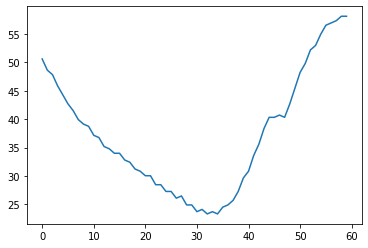

In [17]:
plt.plot(df[df['label'] == 0].iloc[0][:-1])

In [18]:
yy = butter_bandpass_filter(df[df['label'] == 0].iloc[0][:-1], lowcut, highcut, 100, order=5)

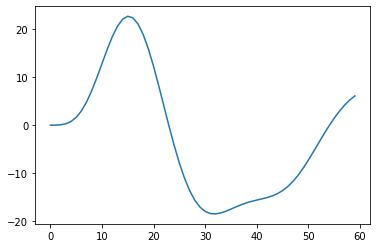

In [19]:
plt.plot(yy)

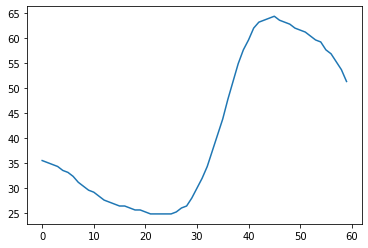

In [20]:
plt.plot(df[df['label'] == 0].iloc[1][:-1])

In [21]:
yy = butter_bandpass_filter(df[df['label'] == 0].iloc[1][:-1], lowcut, highcut, 100, order=5)

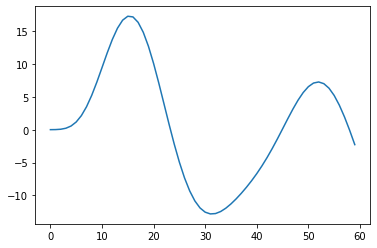

In [22]:
plt.plot(yy)

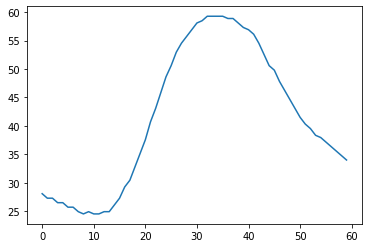

In [23]:
plt.plot(df[df['label'] == -1].iloc[0][:-1])

In [24]:
yy = butter_bandpass_filter(df[df['label'] == -1].iloc[0][:-1], lowcut, highcut, 100, order=5)

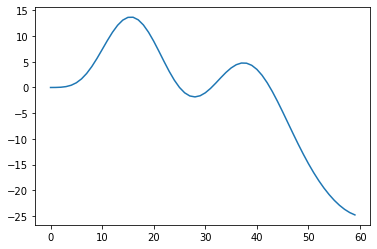

In [25]:
plt.plot(yy)

* filtering

In [26]:
dt_signal_1_bp = []
for i in dt_signal_1:
    yy = butter_bandpass_filter(i, lowcut, highcut, 100, order=5)
    dt_signal_1_bp.append(yy)

In [27]:
dt_signal_1

array([[28.07480049, 27.28479958, 27.28479958, ..., 35.57939911,
        34.78950119, 33.99950027],
       [42.68909836, 40.71419907, 40.31919861, ..., 56.90850067,
        56.90850067, 56.90850067],
       [50.58879852, 48.61389923, 47.82389832, ..., 57.30350113,
        58.09339905, 58.09339905],
       ...,
       [-1.15398002, -1.15398002, -1.15398002, ..., -1.54895997,
        -1.15398002, -1.15398002],
       [42.29410172, 42.29410172, 42.29410172, ..., 35.57939911,
        35.57939911, 35.57939911],
       [37.94929886, 37.94929886, 37.5542984 , ..., 26.49480057,
        27.28479958, 27.67980003]])

In [28]:
dt_signal_1_bp

[array([ 1.03551087e-03,  1.03682090e-02,  5.14077568e-02,  1.70992611e-01,
         4.35513848e-01,  9.16241030e-01,  1.67076364e+00,  2.72685547e+00,
         4.07231393e+00,  5.65213369e+00,  7.37283620e+00,  9.11267875e+00,
         1.07356444e+01,  1.21068418e+01,  1.31072162e+01,  1.36459468e+01,
         1.36694509e+01,  1.31663867e+01,  1.21683223e+01,  1.07461293e+01,
         9.00275225e+00,  7.06341645e+00,  5.06442653e+00,  3.14164266e+00,
         1.41959139e+00,  2.04555424e-03, -1.03524518e+00, -1.64924468e+00,
        -1.83155817e+00, -1.60764582e+00, -1.03354659e+00, -1.90401941e-01,
         8.22771376e-01,  1.89735695e+00,  2.92365505e+00,  3.79888148e+00,
         4.43403710e+00,  4.75924761e+00,  4.72733925e+00,  4.31550004e+00,
         3.52497209e+00,  2.37896289e+00,  9.19190432e-01, -7.98611773e-01,
        -2.71005107e+00, -4.74785573e+00, -6.84719788e+00, -8.94973410e+00,
        -1.10061329e+01, -1.29772744e+01, -1.48343178e+01, -1.65578228e+01,
        -1.8

In [29]:
data = list(dt_signal_1_bp)

In [30]:
label = list(lb_list)

In [31]:
df = pd.DataFrame(data)

In [32]:
df['label'] = label

In [33]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
0,0.001036,0.010368,0.051408,0.170993,0.435514,0.916241,1.670764,2.726855,4.072314,5.652134,...,-16.557823,-18.136147,-19.563323,-20.836682,-21.954588,-22.914638,-23.712579,-24.342134,-24.795672,-1.0
1,0.001575,0.015737,0.077867,0.258432,0.656716,1.378372,2.507385,4.081915,6.079259,8.412061,...,-4.080710,-2.312065,-0.480645,1.354418,3.129940,4.782444,6.251879,7.485007,8.438422,-1.0
2,0.001866,0.018662,0.092400,0.306788,0.779660,1.635887,2.973532,4.834905,7.189087,9.928271,...,-5.517299,-3.693878,-1.887432,-0.156006,1.452293,2.901503,4.168268,5.240709,6.116086,0.0
3,0.001312,0.013162,0.065359,0.217693,0.555122,1.169093,2.133720,3.484909,5.207015,7.228807,...,7.085965,7.250009,6.992992,6.306581,5.206892,3.733231,1.944680,-0.085036,-2.273767,0.0
4,0.001254,0.012577,0.062465,0.208133,0.531066,1.119323,2.044876,3.343665,5.002829,6.956824,...,7.614235,7.631832,7.212338,6.361110,5.108194,3.505503,1.621918,-0.462858,-2.664888,0.0


In [34]:
def ohe(x):
    if x == 0.0:
        return [0, 0, 0]
    elif x == -1.0:
        return  [0, 0, 1]
    else:
        return [1, 0, 0]


In [35]:
df['label'] = df['label'].map(lambda x : ohe(x))

In [36]:
df_drop = df.dropna()

In [37]:
raw_data_norm = df_drop.values

In [38]:
labels = raw_data_norm[:, -1]
data = raw_data_norm[:, 0:-1]

### Conv

In [39]:
from pyts.image import MarkovTransitionField
transformer = MarkovTransitionField()

In [40]:
train_img = transformer.transform(data)

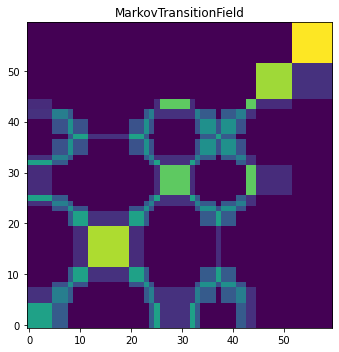

In [41]:
plt.figure(figsize=(5, 5))
plt.imshow(train_img[0], origin='lower')
plt.title('MarkovTransitionField')
plt.tight_layout()
plt.show()

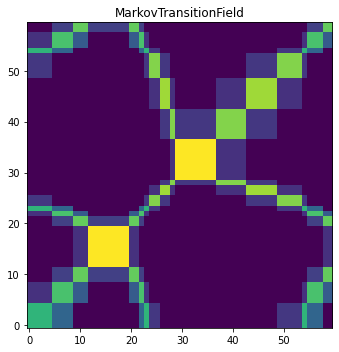

In [42]:
plt.figure(figsize=(5, 5))
plt.imshow(train_img[1], origin='lower')
plt.title('MarkovTransitionField')
plt.tight_layout()
plt.show()

In [43]:
len(train_img[0])

60

In [46]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

def create_vggnet(in_shape=(60, 60, 3), n_classes=3):
    input_tensor = Input(shape=in_shape)
    
    # Block 1
    x = Conv2D(6, (3, 3), activation='relu', padding='same', name='block1_conv1')(input_tensor)
    x = Conv2D(6, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(6, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(6, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), (2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(16, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = MaxPooling2D((2, 2), name='block3_pool')(x)

    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(units = 3, activation = 'relu')(x)
    x = Dropout(0.5)(x)

    # 마지막 softmax 층 적용. 
    output = Dense(units = n_classes, activation = 'softmax')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    model.summary()
    
    return model

In [54]:
model = create_vggnet(in_shape=(60, 60, 3), n_classes=3)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60, 60, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 60, 60, 6)         168       
                                                                 
 block1_conv2 (Conv2D)       (None, 60, 60, 6)         330       
                                                                 
 block1_pool (MaxPooling2D)  (None, 30, 30, 6)         0         
                                                                 
 block2_conv1 (Conv2D)       (None, 30, 30, 6)         330       
                                                                 
 block2_conv2 (Conv2D)       (None, 30, 30, 6)         330       
                                                                 
 block2_pool (MaxPooling2D)  (None, 15, 15, 6)         0   

In [55]:
IMAGE_SIZE = 60
BATCH_SIZE = 8

In [56]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
train_x_rgb = []
for dt in train_img:
  train_x_rgb.append(np.array([dt, dt, dt]).reshape(60, 60, 3))

In [58]:
labels_re = []
for i in labels:
    labels_re.append(i)

In [59]:
train_x = np.asarray(train_x_rgb)
train_y = np.asarray(labels_re)

In [60]:
history = model.fit(x=train_x, y=train_y, epochs=1000, 
                    batch_size=BATCH_SIZE)

Epoch 1/1000


2022-11-28 10:31:28.474735: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8200
2022-11-28 10:31:29.157891: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2022-11-28 10:31:29.157902: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2022-11-28 10:31:29.157930: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2022-11-28 10:31:29.535642: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


147/147 [==============================] - 2s 2ms/step - loss: 0.1664 - accuracy: 0.0870
Epoch 2/1000
147/147 [==============================] - 0s 2ms/step - loss: 0.1666 - accuracy: 0.0811
Epoch 3/1000
147/147 [==============================] - 0s 2ms/step - loss: 0.1821 - accuracy: 0.1169
Epoch 4/1000
147/147 [==============================] - 0s 2ms/step - loss: 25131.4805 - accuracy: 0.2645
Epoch 5/1000
147/147 [==============================] - 0s 2ms/step - loss: 52936892.0000 - accuracy: 0.2722
Epoch 6/1000
147/147 [==============================] - 0s 1ms/step - loss: 1327791616.0000 - accuracy: 0.2799
Epoch 7/1000
147/147 [==============================] - 0s 2ms/step - loss: 892182272.0000 - accuracy: 0.3029
Epoch 8/1000
147/147 [==============================] - 0s 2ms/step - loss: 1957736576.0000 - accuracy: 0.3063
Epoch 9/1000
147/147 [==============================] - 0s 2ms/step - loss: 3511876864.0000 - accuracy: 0.3114
Epoch 10/1000
147/147 [==========================

KeyboardInterrupt: 

: 